# Spam Vs Ham Text Classifier

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import nltk

I used dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! This dataset is already located in the folder for this section.

The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the **readme** file for more info.


In [6]:
messages = [line.rstrip() for line in open('SMSSpamCollection-Copy1')]

In [7]:
len(messages)

5574

First ten messages and number them using **enumerate**:

In [77]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [8]:
messages[30]

"ham\tWait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us"

Due to the spacing it is clearthat this is a TSV ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself. 

In [9]:
message_df = pd.read_csv('SMSSpamCollection-Copy1',sep='\t',
                         names=['Label','Message'])

In [10]:
message_df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Exploration

In [11]:
message_df.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Applying groupby method to get a more nuanaced description of the ham and spam text.

In [13]:
message_df.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

From the above analysis we can see that some of the text messages are not unique.We will be using feature engineering techniques to utilise these text message data set to create our model of ham and spam messages.

In [14]:
message_df['Length'] = message_df['Message'].apply(len)

In [15]:
message_df.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization

Using the length of text message we can analyze the features of the text messages.

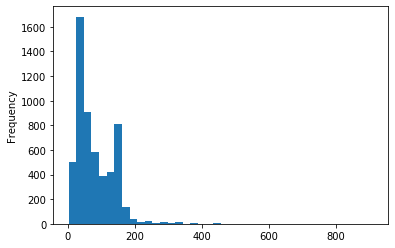

In [16]:
message_df['Length'].plot.hist(bins = 40)

From the histogram plot we can observe a peak at shorter text which we would visualize further. We can also observe that some text message are really long.

In [17]:
message_df.describe()

,Length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [21]:
message_df[message_df['Length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

The longest text is around 900 and its a ham message... we could expect that lentheir texts are going to be ham.

Analyzing the peak of the length based on their label we can get a better picture of whats going on.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A521E59F08>,
      dtype=object)

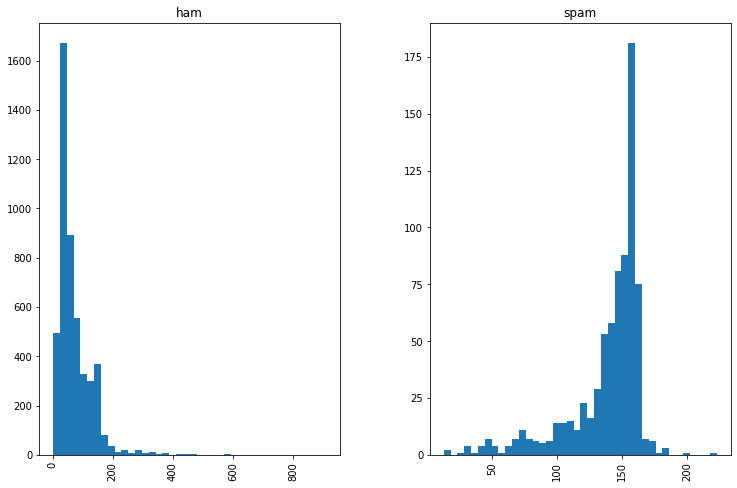

In [22]:
message_df.hist(column='Length',by = 'Label',bins = 40, figsize=(12,8))

Its clear from the graphs that spam message usually range from around hundred to 200 and peak at 150. Where as ham message are usually shorter or extreamly long.

## Text Pre-Processing

In [25]:
import string

In [27]:
from nltk.corpus import stopwords

In [38]:
def clean_msg(msg):
    no_punc = [char for char in msg if char not in string.punctuation]
    clean_txt = ''.join(no_punc)
    no_mess = [word for word in clean_msg.split() if word.lower() not in stopwords.words('english')]
    return no_mess

In [23]:
m = 'Hello! My name is Anushka & I am happy;)'

In [35]:
clean_msg(m)

'Hello name Anushka happy'

In [39]:
message_df['Clean Text'] = message_df['Message'].apply(clean_msg)

We have a dataframe with text cleaned of punctuation and stopwords and tokenized 

In [40]:
message_df.head()

,Label,Message,Length,Clean Text
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, dont, think, goes, usf, lives, around, t..."


We would usually go forward and normalize these texts by stemming or distinguishing using parts of speech but the text are in short hand eg U,IDK etc.. SO normalization does not work on this kind of content. We move on to vectorization directly.

## Vectorization

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
bow_transformer = CountVectorizer(analyzer=clean_msg).fit(message_df['Message'])

In [43]:
print(len(bow_transformer.vocabulary_))

11425


Applying Bow tranformer to a random message from the dataframe

In [54]:
msg_x = message_df['Message'][8]

In [55]:
[msg_x]

['WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']

In [56]:
bow_x = bow_transformer.transform([msg_x])

In [57]:
print(bow_x)

  (0, 219)	1
  (0, 326)	1
  (0, 1485)	1
  (0, 2477)	1
  (0, 4161)	1
  (0, 4221)	1
  (0, 5275)	1
  (0, 5519)	1
  (0, 5574)	1
  (0, 5820)	1
  (0, 7201)	1
  (0, 8406)	1
  (0, 9058)	1
  (0, 9253)	1
  (0, 9413)	1
  (0, 9628)	1
  (0, 10828)	1
  (0, 11412)	1


In [59]:
bow_x.shape

(1, 11425)

In [60]:
bow_transformer.get_feature_names()[9058]

'prize'

#### Applying bow tranform to the entire dataframe

In [62]:
message_bow = bow_transformer.transform(message_df['Message'])

In [79]:
print('Shape of Sparse Matrix: ', message_bow.shape)
print('Amount of Non-Zero occurences: ', message_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


## TF-IDF


____
After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.

____

In [61]:
from sklearn.feature_extraction.text import TfidfTransformer

In [63]:
tfidf_trans = TfidfTransformer().fit(message_bow)

In [64]:
tfidf4 = tfidf_trans.transform(bow_x)

In [65]:
print(tfidf4)

  (0, 11412)	0.25836515425304063
  (0, 10828)	0.2444830149873743
  (0, 9628)	0.2131114486223517
  (0, 9413)	0.2543325495444779
  (0, 9253)	0.2919463626329142
  (0, 9058)	0.18459466577467795
  (0, 8406)	0.21671873645604164
  (0, 7201)	0.22373039911290307
  (0, 5820)	0.19999872529013313
  (0, 5574)	0.2392052705835617
  (0, 5519)	0.1808388416206542
  (0, 5275)	0.12718887288235425
  (0, 4221)	0.28209682807581055
  (0, 4161)	0.22532313131789536
  (0, 2477)	0.2919463626329142
  (0, 1485)	0.20984825984723676
  (0, 326)	0.23684312244512168
  (0, 219)	0.2919463626329142


In [66]:
tfidf_message = tfidf_trans.transform(message_bow)

## Training Model

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a variety of reasons, the Naive Bayes classifier algorithm is a good choice

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
spam_detect = MultinomialNB().fit(tfidf_message,message_df['Label'])

In [70]:
from sklearn.model_selection import train_test_split

In [72]:
msg_train,msg_test,label_train,label_test = train_test_split(tfidf_message,message_df['Label'],test_size =0.3)

In [73]:
model = MultinomialNB().fit(msg_train,label_train)

In [74]:
prediction = model.predict(msg_test)

### Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(label_test,prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1447
        spam       1.00      0.72      0.83       225

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672

